# Death Rate Prediction Using Multiple Linear Regression From Cancer Dataset

## Data

**Data Collection Background**

I collected this dataset from data.world website. 

According to the site, these data were aggregated from a number of sources including the American Community Survey (census.gov), clinicaltrials.gov, and cancer.gov. 

**Task**

Build a multivariate Ordinary Least Squares regression model to predict "TARGET_deathRate"

**Deliverables**

a. Your final model equation

b. The statistical software output including (adjusted) R-squared and Root Mean Squared Error (RMSE)

c. Your code file (if you used a programming language)

d. Model diagnostics including statistics and visualizations:

- Assess linearity of model (parameters)
- Assess serial independence of errors
- Assess heteroskedasticity
- Assess normality of residual distribution
- Assess multicollinearity

e. Model selection:

- Implement k-fold (k=10) cross validation

f. Your interpretation of the model

g. Other factors to consider:

- Are there any outliers?
- Are there missing values?
- How will you handle categorical variables? 

**Data Description**

- avganncount --> Mean number of reported cases of cancer diagnosed annually (a)
- avgdeathsperyear --> Mean number of reported mortalities due to cancer (a)
- target_deathrate --> Dependent variable. Mean per capita (100,000) cancer mortalities (a)
- incidencerate --> Mean per capita (100,000) cancer diagnoses (a)
- medincome --> Median income per county (b)
- popest2015 --> Population of county (b)
- povertypercent --> Percent of populace in poverty (b)
- studypercap --> Per capita number of cancer-related clinical trials per county (a)
- binnedinc --> Median income per capita binned by decile (b)
- medianage --> Median age of county residents (b)
- medianagemale --> Median age of male county residents (b)
- medianagefemale --> Median age of female county residents (b)
- geography --> County name (b)
- percentmarried --> Percent of county residents who are married (b)
- pctnohs18_24 --> Percent of county residents ages 18-24 highest education attained: less than high school (b)
- pcths18_24 --> Percent of county residents ages 18-24 highest education attained: high school diploma (b)
- pctsomecol18_24 --> Percent of county residents ages 18-24 highest education attained: some college (b)
- pctbachdeg18_24 --> Percent of county residents ages 18-24 highest education attained: bachelor's degree (b)
- pcths25_over --> Percent of county residents ages 25 and over highest education attained: high school diploma (b)
- pctbachdeg25_over --> Percent of county residents ages 25 and over highest education attained: bachelor's degree (b)
- pctemployed16_over --> Percent of county residents ages 16 and over employed (b)
- pctunemployed16_over --> Percent of county residents ages 16 and over unemployed (b)
- pctprivatecoverage --> Percent of county residents with private health coverage (b)
- pctprivatecoveragealone --> Percent of county residents with private health coverage alone (no public assistance) (b)
- pctempprivcoverage --> Percent of county residents with employee-provided private health coverage (b)
- pctpubliccoverage --> Percent of county residents with government-provided health coverage (b)
- pctpubliccoveragealone --> Percent of county residents with government-provided health coverage alone (b)
- pctwhite --> Percent of county residents who identify as White (b)
- pctblack --> Percent of county residents who identify as Black (b)
- pctasian --> Percent of county residents who identify as Asian (b)
- pctotherrace --> Percent of county residents who identify in a category which is not White, Black, or Asian (b)
- pctmarriedhouseholds --> Percent of married households (b)
- birthrate --> Number of live births relative to number of women in county (b)

In [464]:
#importing basic necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import category_encoders as ce
from sklearn import preprocessing
from sklearn.impute import KNNImputer
import plotly.express as px
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
import statsmodels.api as lm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## 1. EDA

In [484]:
data = pd.read_csv("cancer_reg.csv")

In [466]:
data

avganncount  avgdeathsperyear  target_deathrate  incidencerate  \
0     1397.000000               469             164.9     489.800000   
1      173.000000                70             161.3     411.600000   
2      102.000000                50             174.7     349.700000   
3      427.000000               202             194.8     430.400000   
4       57.000000                26             144.4     350.100000   
...           ...               ...               ...            ...   
3042  1962.667684                15             149.6     453.549422   
3043  1962.667684                43             150.1     453.549422   
3044  1962.667684                46             153.9     453.549422   
3045  1962.667684                52             175.0     453.549422   
3046  1962.667684                48             213.6     453.549422   

      medincome  popest2015  povertypercent  studypercap           binnedinc  \
0         61898      260131            11.2   499.748204   (61494.5, 125635]   
1         48127       43269            18.6    23.111234  (48021.6, 51046.4]   
2         49348       21026            14.6    47.560164  (48021.6, 51046.4]   
3         44243       75882            17.1   342.637253    (42724.4, 45201]   
4         49955       10321            12.5     0.000000  (48021.6, 51046.4]   
...         ...         ...             ...          ...                 ...   
3042      46961        6343            12.4     0.000000    (45201, 48021.6]   
3043      48609       37118            18.8   377.175494  (48021.6, 51046.4]   
3044      51144       34536            15.0  1968.959926  (51046.4, 54545.6]   
3045      50745       25609            13.3     0.000000  (48021.6, 51046.4]   
3046      41193       37030            13.9     0.000000  (40362.7, 42724.4]   

      medianage  ...  pctprivatecoveragealone  pctempprivcoverage  \
0          39.3  ...                      NaN                41.6   
1          33.0  ...                     53.8                43.6   
2          45.0  ...                     43.5                34.9   
3          42.8  ...                     40.3                35.0   
4          48.3  ...                     43.9                35.1   
...         ...  ...                      ...                 ...   
3042       44.2  ...                     54.9                44.6   
3043       30.4  ...                     53.3                48.6   
3044       30.9  ...                     52.6                47.8   
3045       39.0  ...                     56.3                49.6   
3046       26.2  ...                     60.3                22.9   

     pctpubliccoverage  pctpubliccoveragealone   pctwhite   pctblack  \
0                 32.9                    14.0  81.780529   2.594728   
1                 31.1                    15.3  89.228509   0.969102   
2                 42.1                    21.1  90.922190   0.739673   
3                 45.3                    25.0  91.744686   0.782626   
4                 44.0                    22.7  94.104024   0.270192   
...                ...                     ...        ...        ...   
3042              31.7                    13.2  90.280811   3.837754   
3043              28.8                    17.7  75.706245   2.326771   
3044              26.6                    16.8  87.961629   2.313188   
3045              29.5                    14.0  92.905681   1.176562   
3046              25.1                    12.6  70.098132  16.590100   

      pctasian  pctotherrace  pctmarriedhouseholds  birthrate  
0     4.821857      1.843479             52.856076   6.118831  
1     2.246233      3.741352             45.372500   4.333096  
2     0.465898      2.747358             54.444868   3.729488  
3     1.161359      1.362643             51.021514   4.603841  
4     0.665830      0.492135             54.027460   6.796657  
...        ...           ...                   ...        ...  
3042  0.327613      1.700468          

In [467]:
data.shape

(3047, 33)

In [468]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avganncount              3047 non-null   float64
 1   avgdeathsperyear         3047 non-null   int64  
 2   target_deathrate         3047 non-null   float64
 3   incidencerate            3047 non-null   float64
 4   medincome                3047 non-null   int64  
 5   popest2015               3047 non-null   int64  
 6   povertypercent           3047 non-null   float64
 7   studypercap              3047 non-null   float64
 8   binnedinc                3047 non-null   object 
 9   medianage                3047 non-null   float64
 10  medianagemale            3047 non-null   float64
 11  medianagefemale          3047 non-null   float64
 12  geography                3047 non-null   object 
 13  percentmarried           3047 non-null   float64
 14  pctnohs18_24            

In [469]:
data.describe()

avganncount  avgdeathsperyear  target_deathrate  incidencerate  \
count   3047.000000       3047.000000       3047.000000    3047.000000   
mean     606.338544        185.965868        178.664063     448.268586   
std     1416.356223        504.134286         27.751511      54.560733   
min        6.000000          3.000000         59.700000     201.300000   
25%       76.000000         28.000000        161.200000     420.300000   
50%      171.000000         61.000000        178.100000     453.549422   
75%      518.000000        149.000000        195.200000     480.850000   
max    38150.000000      14010.000000        362.800000    1206.900000   

           medincome    popest2015  povertypercent  studypercap    medianage  \
count    3047.000000  3.047000e+03     3047.000000  3047.000000  3047.000000   
mean    47063.281917  1.026374e+05       16.878175   155.399415    45.272333   
std     12040.090836  3.290592e+05        6.409087   529.628366    45.304480   
min     22640.000000  8.270000e+02        3.200000     0.000000    22.300000   
25%     38882.500000  1.168400e+04       12.150000     0.000000    37.700000   
50%     45207.000000  2.664300e+04       15.900000     0.000000    41.000000   
75%     52492.000000  6.867100e+04       20.400000    83.650776    44.000000   
max    125635.000000  1.017029e+07       47.400000  9762.308998   624.000000   

       medianagemale  ...  pctprivatecoveragealone  pctempprivcoverage  \
count    3047.000000  ...              2438.000000         3047.000000   
mean       39.570725  ...                48.453774           41.196324   
std         5.226017  ...                10.083006            9.447687   
min        22.400000  ...                15.700000           13.500000   
25%        36.350000  ...                41.000000           34.500000   
50%        39.600000  ...                48.700000           41.100000   
75%        42.500000  ...                55.600000           47.700000   
max        64.700000  ...                78.900000           70.700000   

       pctpubliccoverage  pctpubliccoveragealone     pctwhite     pctblack  \
count        3047.000000             3047.000000  3047.000000  3047.000000   
mean           36.252642               19.240072    83.645286     9.107978   
std             7.841741                6.113041    16.380025    14.534538   
min            11.200000                2.600000    10.199155     0.000000   
25%            30.900000               14.850000    77.296180     0.620675   
50%            36.300000               18.800000    90.059774     2.247576   
75%            41.550000               23.100000    95.451693    10.509732   
max            65.100000               46.600000   100.000000    85.947799   

          pctasian  pctotherrace  pctmarriedhouseholds    birthrate  
count  3047.000000   3047.000000           3047.000000  3047.000000  
mean      1.253965      1.983523             51.243872     5.640306  
std       2.610276      3.517710              6.572814     1.985816  
min       0.000000      0.000000             22.992490     0.000000  
25%       0.254199      0.295172             47.763063     4.521419  
50%       0.549812      0.826185             51.669941     5.381478  
75%       1.221037      2.177960             55.395132     6.493677  
max      42.619425     41.930251             78.075397    21.326165  

[8 rows x 31 columns]

In [470]:
dtypes = pd.DataFrame(data.dtypes,columns=["Data Type"])

dtypes["Unique Values"]=data.nunique()

dtypes["Null Values"]=data.isnull().sum()

dtypes["% null Values"]=data.isnull().sum()/len(data)

dtypes.sort_values(by="Null Values" , ascending=False).style.background_gradient(cmap='YlOrRd',axis=0)

## 2. Data Preprocessing

### 2.1 Handling Categorical Variables

In [485]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data['binnedinc']= le.fit_transform(data['binnedinc'])

There are 3047 unique categorical values in 'geography' column, which needs to be encoded.
We use CatBoost Encoder here-
- This encoding picks up the values that can explain the target variable.
- Here the average of target variable is computed by category. 
- It replaces a categorical feature with average value of target corresponding to that category in training dataset combined with the target probability over the entire dataset. 
- But this introduces a target leakage since the target is used to predict the target. Such models tend to be overfitted and don’t generalize well in unseen circumstances.
- It involves an ordering principle in order to overcome this problem of target leakage.
- The values of target statistic rely on the observed history, i.e, target probability for the current feature is calculated only from the rows (observations) before it.
- Formula :
 (Target_Sum + Prior)/(Feature_Count + 1), where Target_Sum = Sum of the target value for that particular categorical feature (upto the current one) , Prior = It is a constant value determined by (sum of target values in the whole dataset)/(total number of observations (i.e. rows) in the dataset) , Feature_Count = Total number of categorical features observed upto the current one with the same value as the current one.

In [486]:
# Define train and target
y = data[['target_deathrate']]
X = data.drop('target_deathrate', axis = 1)
  
# Define catboost encoder
cbe_encoder = ce.cat_boost.CatBoostEncoder()
  
# Fit encoder and transform the features
cbe_encoder.fit(X, y)
X = cbe_encoder.transform(X)

In [487]:
X['geography']

0       178.664063
1       178.664063
2       178.664063
3       178.664063
4       178.664063
           ...    
3042    178.664063
3043    178.664063
3044    178.664063
3045    178.664063
3046    178.664063
Name: geography, Length: 3047, dtype: float64

In [488]:
data = pd.concat([X,y],axis = 1)

In [489]:
data

avganncount  avgdeathsperyear  incidencerate  medincome  popest2015  \
0     1397.000000               469     489.800000      61898      260131   
1      173.000000                70     411.600000      48127       43269   
2      102.000000                50     349.700000      49348       21026   
3      427.000000               202     430.400000      44243       75882   
4       57.000000                26     350.100000      49955       10321   
...           ...               ...            ...        ...         ...   
3042  1962.667684                15     453.549422      46961        6343   
3043  1962.667684                43     453.549422      48609       37118   
3044  1962.667684                46     453.549422      51144       34536   
3045  1962.667684                52     453.549422      50745       25609   
3046  1962.667684                48     453.549422      41193       37030   

      povertypercent  studypercap  binnedinc  medianage  medianagemale  ...  \
0               11.2   499.748204          8       39.3           36.9  ...   
1               18.6    23.111234          5       33.0           32.2  ...   
2               14.6    47.560164          5       45.0           44.0  ...   
3               17.1   342.637253          3       42.8           42.2  ...   
4               12.5     0.000000          5       48.3           47.8  ...   
...              ...          ...        ...        ...            ...  ...   
3042            12.4     0.000000          4       44.2           41.1  ...   
3043            18.8   377.175494          5       30.4           29.3  ...   
3044            15.0  1968.959926          6       30.9           30.5  ...   
3045            13.3     0.000000          5       39.0           36.9  ...   
3046            13.9     0.000000          2       26.2           25.5  ...   

      pctempprivcoverage  pctpubliccoverage  pctpubliccoveragealone  \
0                   41.6               32.9                    14.0   
1                   43.6               31.1                    15.3   
2                   34.9               42.1                    21.1   
3                   35.0               45.3                    25.0   
4                   35.1               44.0                    22.7   
...                  ...                ...                     ...   
3042                44.6               31.7                    13.2   
3043                48.6               28.8                    17.7   
3044                47.8               26.6                    16.8   
3045                49.6               29.5                    14.0   
3046                22.9               25.1                    12.6   

       pctwhite   pctblack  pctasian  pctotherrace  pctmarriedhouseholds  \
0     81.780529   2.594728  4.821857      1.843479             52.856076   
1     89.228509   0.969102  2.246233      3.741352             45.372500   
2     90.922190   0.739673  0.465898      2.747358             54.444868   
3     91.744686   0.782626  1.161359      1.362643             51.021514   
4     94.104024   0.270192  0.665830      0.492135             54.027460   
...         ...        ...       ...           ...                   ...   
3042  90.280811   3.837754  0.327613      1.700468             51.063830   
3043  75.706245   2.326771  4.044920     14.130288             52.007937   
3044  87.961629   2.313188  1.316472      5.680705             55.153949   
3045  92.905681   1.176562  0.244632      2.131790             58.484232   
3046  70.098132  16.590100  3.177753      1.356457             56.040242   

      birthrate  target_deathrate  
0      6.118831             164.9  
1      4.333096             161.3  
2      3.729488             174.7  
3      4.603841             194.8  
4      6.796657             144.4  
...         ...               ...  
3042   7.773512             149.6  
3043   8.186470             150.1  
3044   7.809192             153.9  
3045  

Another categorical column, 'binnedinc' has 10 unique values. And this column represents median income per capita binned by decile. So, this can be using LabelEncoder. CatBoost Encoder automatically applies LabelEncoding for this feature.

### 2.2 Missing Value Handling

In [490]:
imputer = KNNImputer(n_neighbors=2)
data2 = imputer.fit_transform(data[['pctsomecol18_24','pctprivatecoveragealone','pctemployed16_over']])

In [491]:
data2 = pd.DataFrame(data2,columns = ['pctsomecol18_24','pctprivatecoveragealone','pctemployed16_over'])

In [492]:
data = data.drop(['pctsomecol18_24','pctprivatecoveragealone','pctemployed16_over'],axis = 1)

In [493]:
data = pd.concat([data,data2],axis = 1)

In [494]:
data.isnull().sum()

avganncount                0
avgdeathsperyear           0
incidencerate              0
medincome                  0
popest2015                 0
povertypercent             0
studypercap                0
binnedinc                  0
medianage                  0
medianagemale              0
medianagefemale            0
geography                  0
percentmarried             0
pctnohs18_24               0
pcths18_24                 0
pctbachdeg18_24            0
pcths25_over               0
pctbachdeg25_over          0
pctunemployed16_over       0
pctprivatecoverage         0
pctempprivcoverage         0
pctpubliccoverage          0
pctpubliccoveragealone     0
pctwhite                   0
pctblack                   0
pctasian                   0
pctotherrace               0
pctmarriedhouseholds       0
birthrate                  0
target_deathrate           0
pctsomecol18_24            0
pctprivatecoveragealone    0
pctemployed16_over         0
dtype: int64

## 3. Visualizing Data

### 3.1 Scatterplot Matrix

In [444]:
fig = px.scatter_matrix(data,width=1500, height=2000)
fig.show()

### 3.2 Correlation Matrix

C:\Users\KEYA\AppData\Local\Temp\ipykernel_8988\1769029868.py:3: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



<AxesSubplot:>

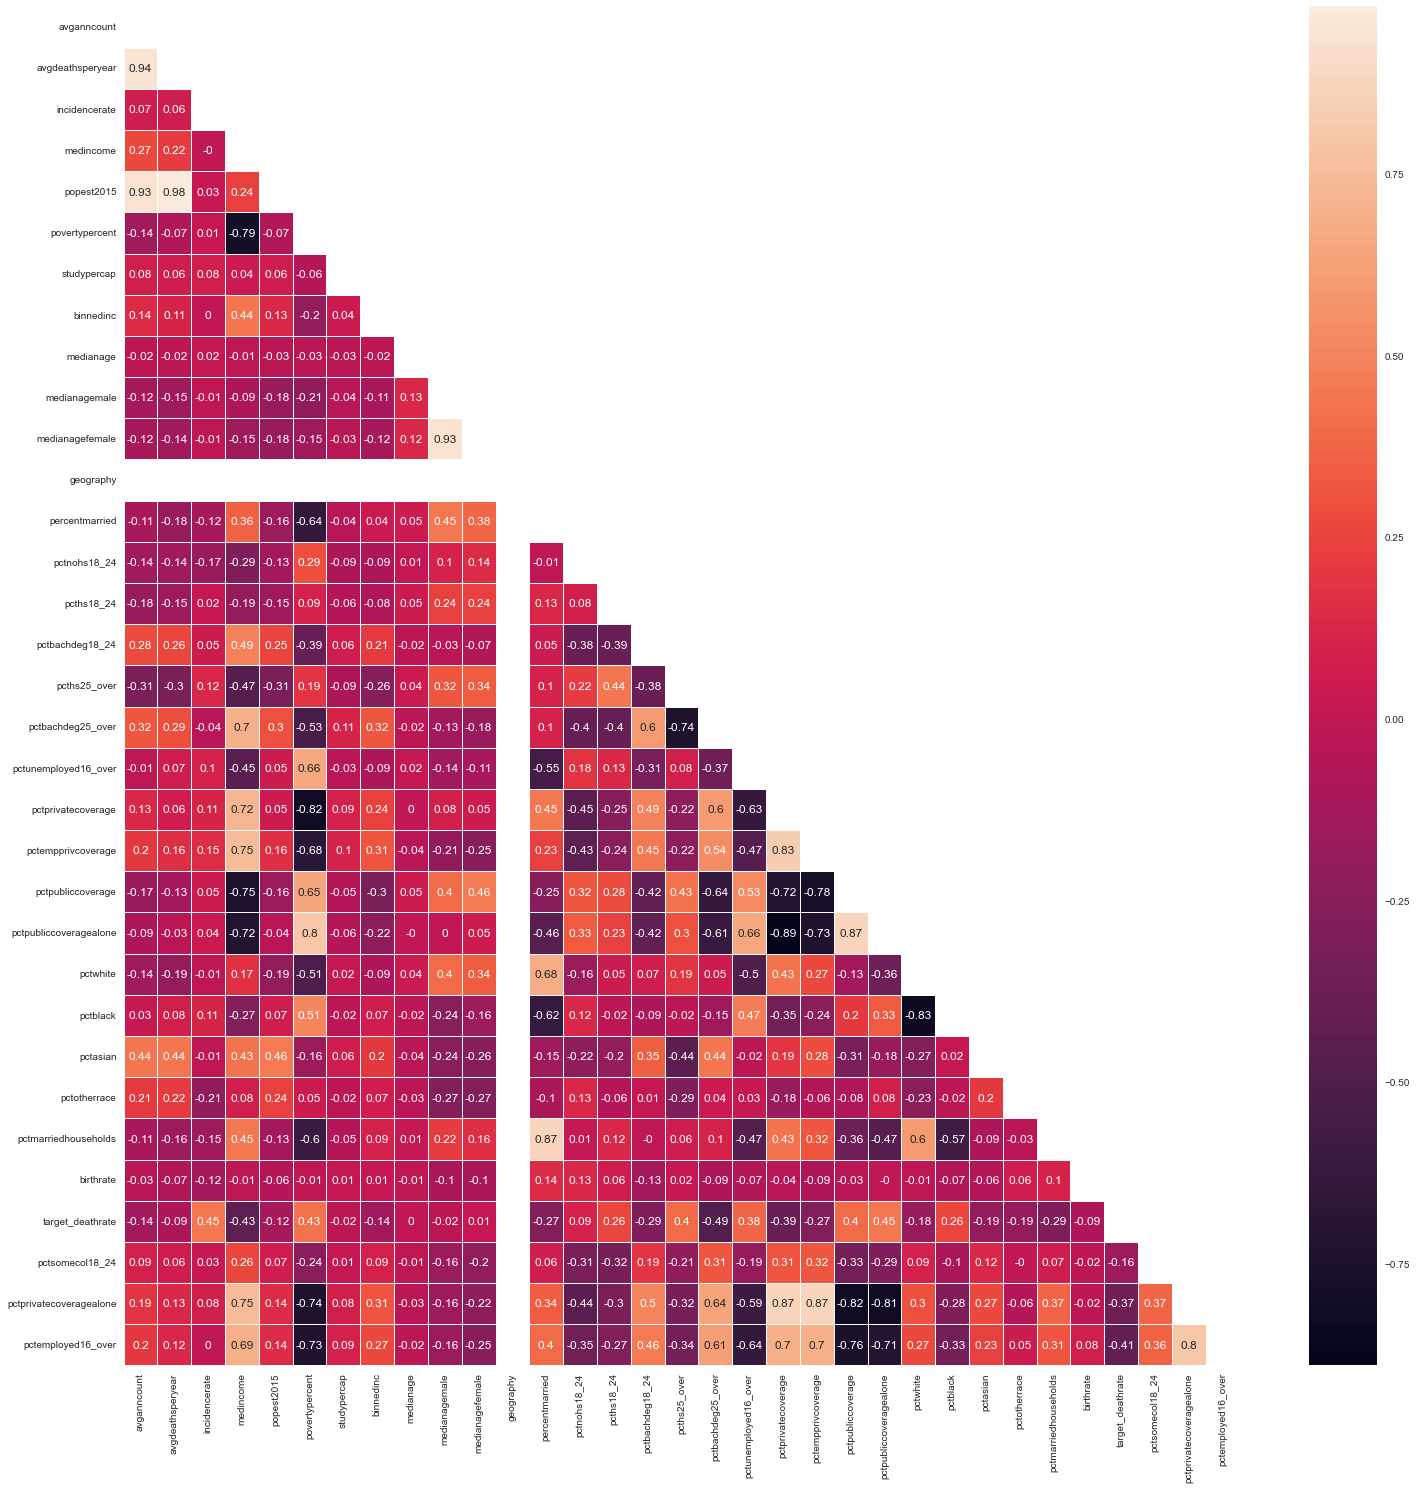

In [495]:
matrix = data.corr().round(2)
fig, ax = plt.subplots(figsize=(25,25)) 
mask = np.zeros_like(matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(matrix, annot=True,linewidths=.5, ax=ax,mask=mask)

### 3.3 Histogram Plot

LinAlgError: The data appears to lie in a lower-dimensional subspace of the space in which it is expressed. This has resulted in a singular data covariance matrix, which cannot be treated using the algorithms implemented in `gaussian_kde`. Consider performing principle component analysis / dimensionality reduction and using `gaussian_kde` with the transformed data.

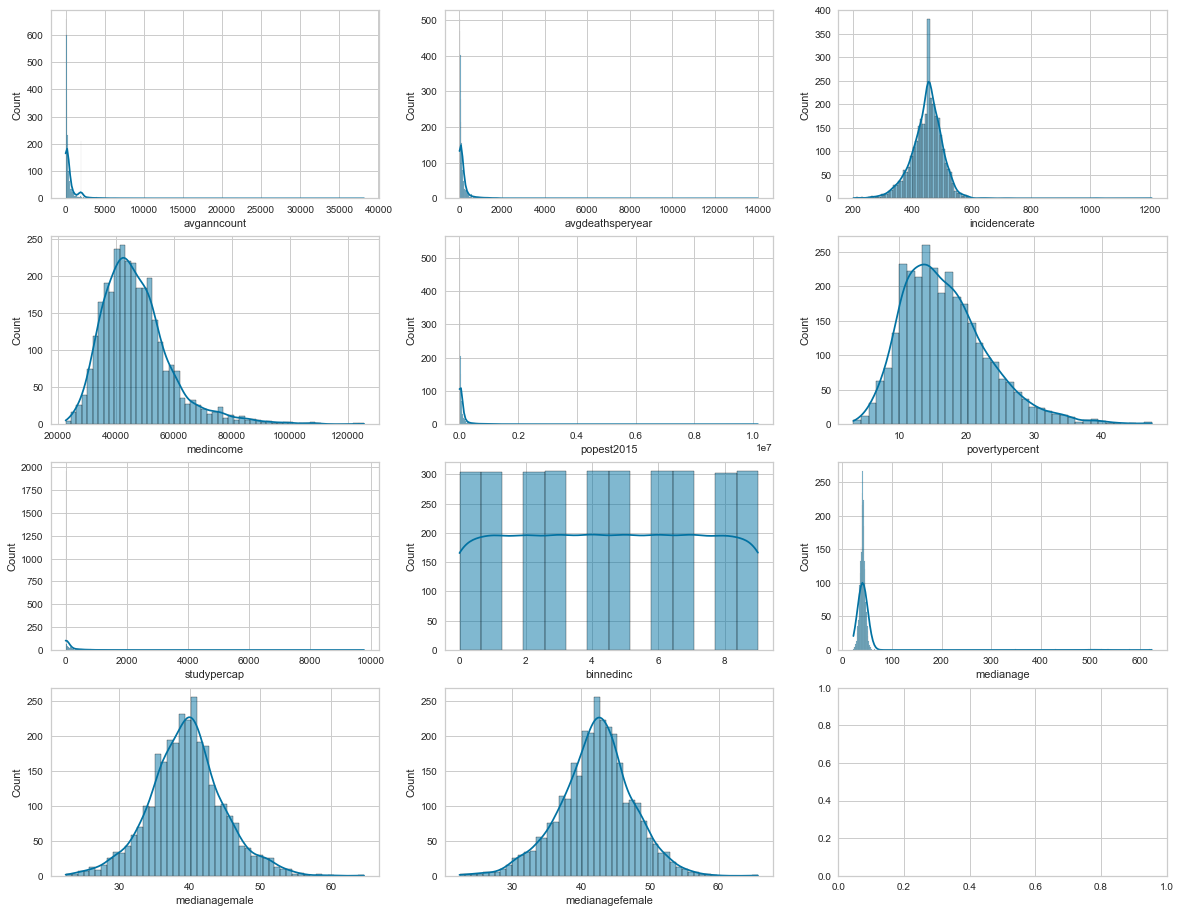

In [496]:
plt.figure(figsize=(20,45))

for i, col in enumerate(data.columns):

        ax = plt.subplot(11, 3,i+1)

        sns.histplot(data[col] , ax=ax , kde=True)

        plt.xlabel(col)
        
plt.show()

### 3.4 Boxplot

avganncount


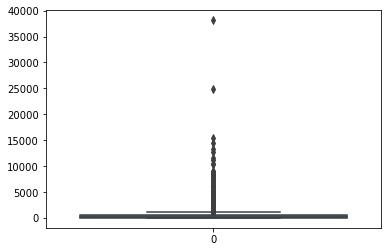

avgdeathsperyear


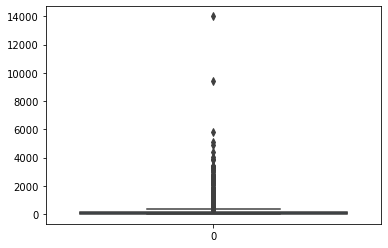

target_deathrate


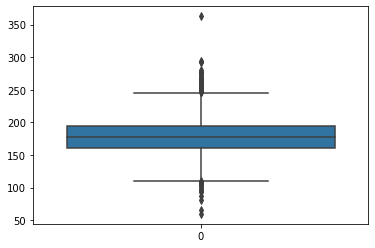

incidencerate


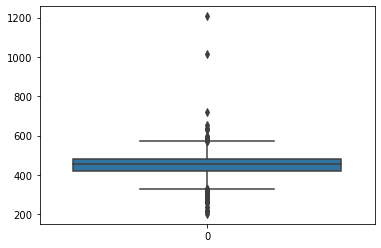

medincome


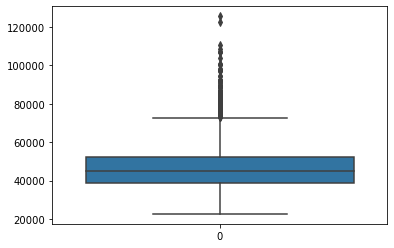

popest2015


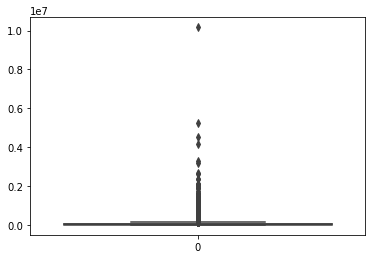

povertypercent


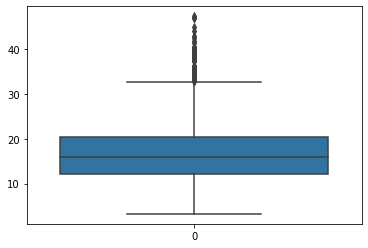

studypercap


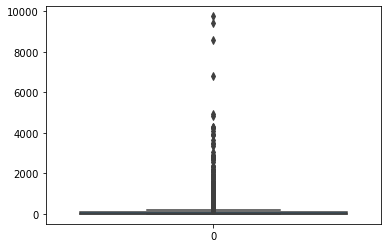

binnedinc


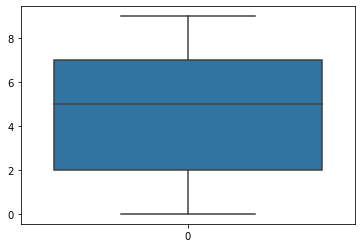

medianage


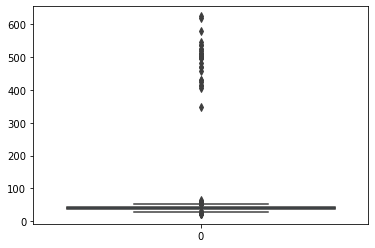

medianagemale


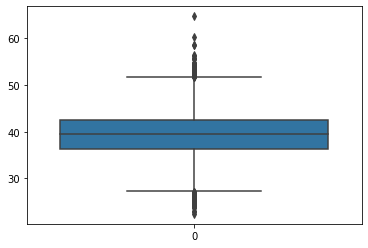

medianagefemale


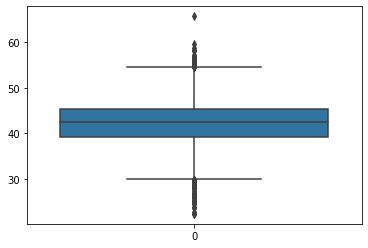

geography


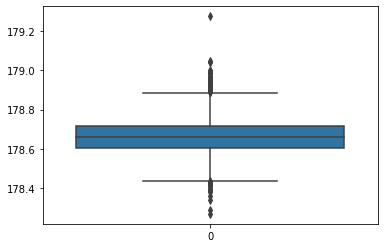

percentmarried


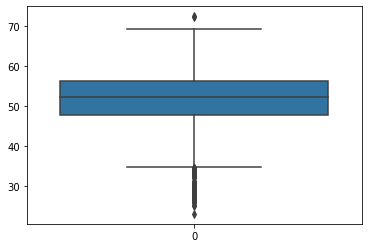

pctnohs18_24


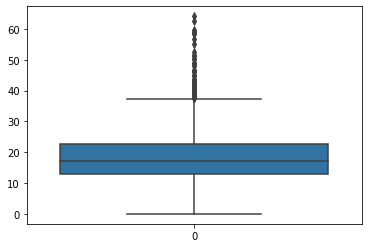

pcths18_24


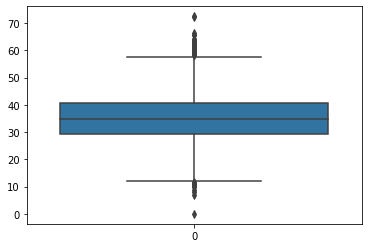

pctsomecol18_24


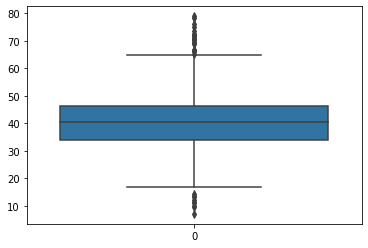

pctbachdeg18_24


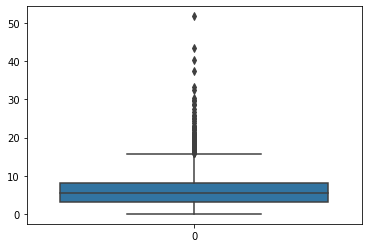

pcths25_over


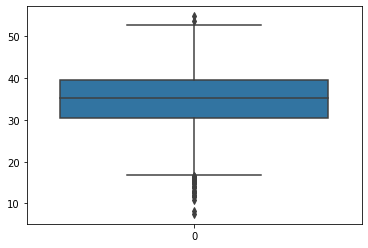

pctbachdeg25_over


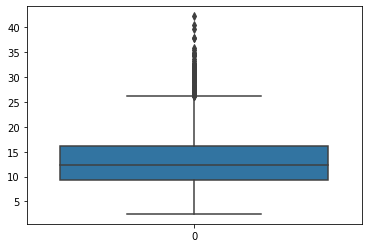

pctemployed16_over


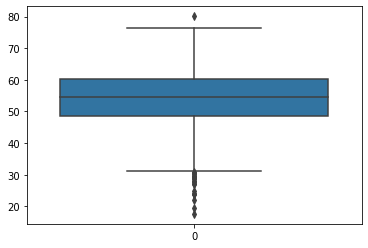

pctunemployed16_over


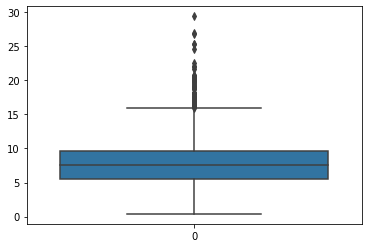

pctprivatecoverage


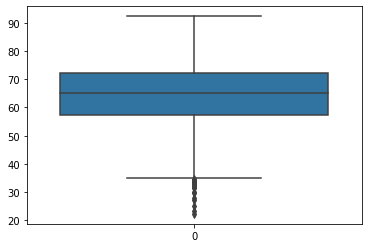

pctprivatecoveragealone


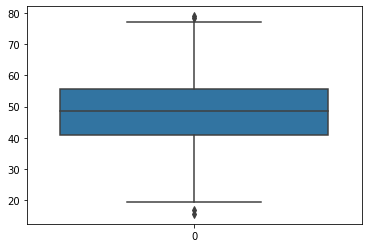

pctempprivcoverage


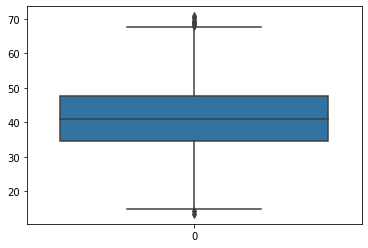

pctpubliccoverage


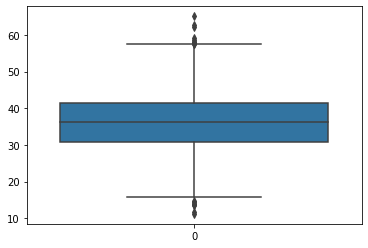

pctpubliccoveragealone


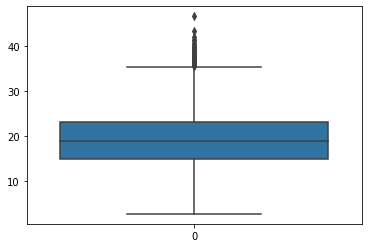

pctwhite


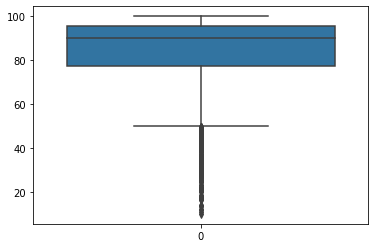

pctblack


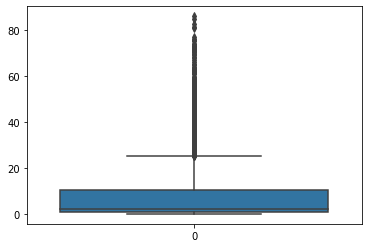

pctasian


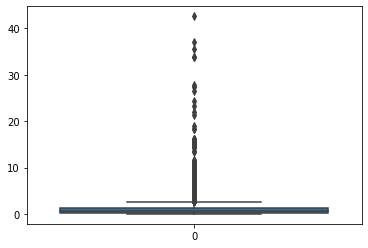

pctotherrace


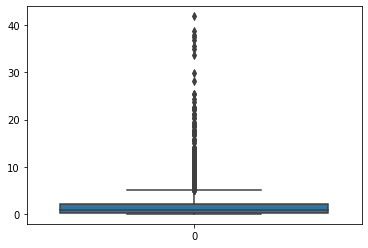

pctmarriedhouseholds


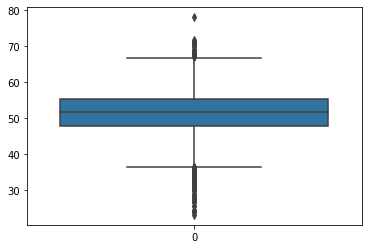

birthrate


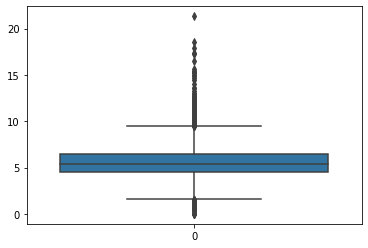

In [114]:
for i in data.columns:
    print(i)
    sns.boxplot(data = data[i])
    plt.show()

## 4. Feature Engineering

### 4.1 Feature, Target Variable

In [497]:
X = data.drop(['target_deathrate'],axis = 1)
y = data['target_deathrate']

### 4.2 Feature Scaling

In [498]:
from sklearn.preprocessing import StandardScaler
for i in X.columns:
    
    # fit on training data column
    scale = StandardScaler().fit(X[[i]])
    
    # transform the data column
    X[i] = scale.transform(X[[i]])


### 4.3 Checking Multicolinearity using VIF

In [499]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

In [500]:
print(vif_data)

                    feature        VIF
0               avganncount   9.800824
1          avgdeathsperyear  31.614176
2             incidencerate   1.265916
3                 medincome   8.438087
4                popest2015  26.476858
5            povertypercent   9.121181
6               studypercap   1.050053
7                 binnedinc   1.398410
8                 medianage   1.025131
9             medianagemale   9.668979
10          medianagefemale  10.714206
11                geography   1.000000
12           percentmarried  10.524157
13             pctnohs18_24   1.749502
14               pcths18_24   1.739043
15          pctbachdeg18_24   1.991703
16             pcths25_over   3.774364
17        pctbachdeg25_over   5.688732
18     pctunemployed16_over   2.693727
19       pctprivatecoverage  18.727968
20       pctempprivcoverage   8.032566
21        pctpubliccoverage  26.954351
22   pctpubliccoveragealone  24.730945
23                 pctwhite   7.150768
24                 pctbla

### 4.4 Feature Selection - Recusrive Feature Elimination

In [508]:
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=20, step=1)
selector = selector.fit(X, y)

In [509]:
selector.support_

array([ True,  True,  True, False,  True,  True, False, False, False,
        True,  True, False,  True, False,  True, False,  True,  True,
       False,  True,  True,  True,  True,  True, False, False,  True,
        True,  True, False, False,  True])

In [510]:
selector.ranking_

array([ 1,  1,  1,  2,  1,  1, 12,  5, 11,  1,  1, 13,  1,  3,  1,  7,  1,
        1,  6,  1,  1,  1,  1,  1,  4, 10,  1,  1,  1,  9,  8,  1])

In [511]:
X_cols=X.columns.tolist()
selected_features= [i for indx,i in enumerate(X_cols) if selector.support_[indx] == True]#select columns that are significant
selected_features

['avganncount',
 'avgdeathsperyear',
 'incidencerate',
 'popest2015',
 'povertypercent',
 'medianagemale',
 'medianagefemale',
 'percentmarried',
 'pcths18_24',
 'pcths25_over',
 'pctbachdeg25_over',
 'pctprivatecoverage',
 'pctempprivcoverage',
 'pctpubliccoverage',
 'pctpubliccoveragealone',
 'pctwhite',
 'pctotherrace',
 'pctmarriedhouseholds',
 'birthrate',
 'pctemployed16_over']

### 4.5 Checking Significance of Selected Features

In [512]:
from statsmodels.api import add_constant

In [513]:
import statsmodels.api as lm
X_new = X[selected_features]
X_lm=lm.add_constant(X_new)
model=lm.OLS(y,X_lm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       target_deathrate   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     165.1
Date:                Sun, 16 Apr 2023   Prob (F-statistic):               0.00
Time:                        01:12:02   Log-Likelihood:                -13325.
No. Observations:                3047   AIC:                         2.669e+04
Df Residuals:                    3026   BIC:                         2.682e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    178.6641      0.349    512.210      0.000     177.980     179.348
avganncount               -4.6043      1.086     -4.240      0.000      -6.734      -2.475
avgdeathsperyear           8.8638      1.941      4.566      0.000       5.057      12.670
incidencerate             10.5454      0.389     27.127      0.000       9.783      11.308
popest2015                -4.9443      1.771     -2.792      0.005      -8.416      -1.473
povertypercent             1.6133      0.892      1.809      0.071      -0.136       3.362
medianagemale             -2.1318      1.072     -1.989      0.047      -4.233      -0.030
medianagefemale           -1.4384      1.099     -1.309      0.191      -3.594       0.717
percentmarried             8.6282      1.114      7.748      0.000       6.445      10.812
pcths18_24                 2.3482      0.419      5.605      0.000       1.527       3.170
pcths25_over               2.5572      0.650      3.933      0.000       1.282       3.832
pctbachdeg25_over         -5.8533      0.781     -7.493      0.000      -7.385      -4.322
pctprivatecoverage        -4.5135      1.316     -3.430      0.001      -7.094      -1.933
pctempprivcoverage         3.9089      0.931      4.200      0.000       2.084       5.734
pctpubliccoverage         -2.2829      1.717     -1.329      0.184      -5.650       1.084
pctpubliccoveragealone     2.8198      1.672      1.687      0.092      -0.458       6.097
pctwhite                  -1.6967      0.526     -3.228      0.001      -2.727      -0.666
pctotherrace              -3.1063      0.413     -7.519      0.000      -3.916      -2.296
pctmarriedhouseholds      -8.1441      0.966     -8.426      0.000     -10.039      -6.249
birthrate                 -1.7044      0.378     -4.513      0.000      -2.445      -0.964
pctemployed16_over        -4.7007      0.810     -5.806      0.000      -6.288      -3.113
==============================================================================
Omnibus:                      206.016   Durbin-Watson:                   1.780
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              877.177
Skew:                           0.171   Prob(JB):                    3.34e-191
Kurtosis:                       5.606   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Since p value for the columns, 'medianagefemale','pctbachdeg18_24','pctpubliccoverage','pctpubliccoveragealone','pctblack','pctasian' is greater than 0.05, hence we drop those columns from feature space.

In [515]:
X_new1 = X_new.drop(['povertypercent','medianagefemale','pctpubliccoverage','pctpubliccoveragealone'],axis = 1)

In [516]:
X_new1.shape

(3047, 16)

In [517]:
X_lm1=lm.add_constant(X_new1)
model=lm.OLS(y,X_lm1).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       target_deathrate   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     205.3
Date:                Sun, 16 Apr 2023   Prob (F-statistic):               0.00
Time:                        01:13:59   Log-Likelihood:                -13330.
No. Observations:                3047   AIC:                         2.669e+04
Df Residuals:                    3030   BIC:                         2.680e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  178.6641 

## 5. Checking Influence of Outliers

In [518]:
influence = model.get_influence()
pd.Series(influence.hat_matrix_diag).describe()

count    3047.000000
mean        0.005579
std         0.009843
min         0.000653
25%         0.002565
50%         0.003809
75%         0.006282
max         0.394443
dtype: float64

In [519]:
inf_sum = influence.summary_frame()

print(inf_sum.head())

   dfb_const  dfb_avganncount  dfb_avgdeathsperyear  dfb_incidencerate  \
0  -0.006878         0.000599             -0.003337          -0.005531   
1   0.005912        -0.001054             -0.001101          -0.003568   
2   0.020532        -0.001081              0.000850          -0.032606   
3   0.009064        -0.002843              0.005779          -0.003777   
4  -0.013090         0.001758              0.001443           0.021367   

   dfb_popest2015  dfb_medianagemale  dfb_percentmarried  dfb_pcths18_24  \
0        0.002684           0.009267           -0.002617       -0.010512   
1        0.000753          -0.009955           -0.000078       -0.002030   
2       -0.001322           0.000287            0.003006        0.008826   
3       -0.004076           0.001155            0.001938        0.007582   
4       -0.002241          -0.008557           -0.009897       -0.009573   

   dfb_pcths25_over  dfb_pctbachdeg25_over  ...  dfb_pctotherrace  \
0          0.009337          



Leverage vs. Studentized Residuals


C:\Users\KEYA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'Studentized Residuals')

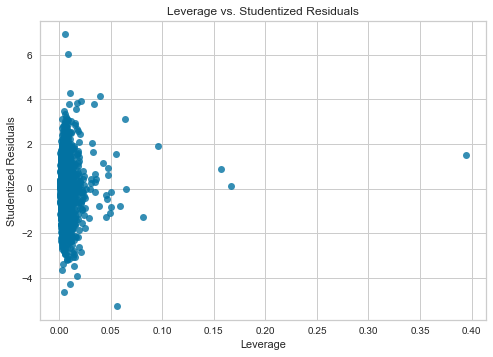

In [520]:
student_resid = influence.resid_studentized_external
(cooks, p) = influence.cooks_distance
(dffits, p) = influence.dffits
leverage = influence.hat_matrix_diag


print ('\n')
print ('Leverage vs. Studentized Residuals')
sns.regplot(leverage, model.resid_pearson,  fit_reg=False)
plt.title('Leverage vs. Studentized Residuals')
plt.xlabel('Leverage')
plt.ylabel('Studentized Residuals')

From this plot,we can suspect fewinfluential outliers in the data

In [521]:
#Concat target deathrate and the resulting residual table
#Note that hat_diag is leverage so change the ciolumn heading from hat_diag to leverage

from statsmodels.formula.api import ols

yres = pd.concat([y, inf_sum], axis = 1)
yres = yres.rename(columns={'hat_diag': 'leverage'})
yres.head()

target_deathrate  dfb_const  dfb_avganncount  dfb_avgdeathsperyear  \
0             164.9  -0.006878         0.000599             -0.003337   
1             161.3   0.005912        -0.001054             -0.001101   
2             174.7   0.020532        -0.001081              0.000850   
3             194.8   0.009064        -0.002843              0.005779   
4             144.4  -0.013090         0.001758              0.001443   

   dfb_incidencerate  dfb_popest2015  dfb_medianagemale  dfb_percentmarried  \
0          -0.005531        0.002684           0.009267           -0.002617   
1          -0.003568        0.000753          -0.009955           -0.000078   
2          -0.032606       -0.001322           0.000287            0.003006   
3          -0.003777       -0.004076           0.001155            0.001938   
4           0.021367       -0.002241          -0.008557           -0.009897   

   dfb_pcths18_24  dfb_pcths25_over  ...  dfb_pctotherrace  \
0       -0.010512          0.009337  ...          0.000635   
1       -0.002030          0.005598  ...          0.004804   
2        0.008826         -0.013069  ...          0.002443   
3        0.007582         -0.018571  ...         -0.005170   
4       -0.009573          0.003758  ...          0.004954   

   dfb_pctmarriedhouseholds  dfb_birthrate  dfb_pctemployed16_over   cooks_d  \
0                  0.001484      -0.000845                0.009206  0.000039   
1                 -0.004114      -0.003035               -0.005467  0.000029   
2                 -0.001066      -0.018858               -0.024494  0.000239   
3                 -0.003189      -0.005641               -0.000613  0.000036   
4                  0.010260      -0.009367                0.015170  0.000103   

   standard_resid  leverage  dffits_internal  student_resid    dffits  
0       -0.378854  0.004585        -0.025713      -0.378801 -0.025710  
1        0.325625  0.004640         0.022234       0.325577  0.022230  
2        1.131510  0.003168         0.063788       1.131562  0.063791  
3        0.499787  0.002463         0.024835       0.499725  0.024832  
4       -0.721381  0.003365        -0.041917      -0.721324 -0.041914  

[5 rows x 24 columns]

### 5.1 Studentized residuals for identifying outliers

In [522]:
#studentized residuals is denoted as r
#studentized residuals that exceed +2 or -2 are concerning
#studentized residuals that exceed +3 or -3 are extremely concerning

r = yres.student_resid
print ('-'*30 + ' studentized residual ' + '-'*30)
print (r.describe())
print ('\n')

r_sort = yres.sort_values(by = 'student_resid')
print ('-'*30 + ' top 5 most negative residuals ' + '-'*30)
print (r_sort.head())
print ('\n')

print ('-'*30 + ' top 5 most positive residuals ' + '-'*30)
print (r_sort.tail())


------------------------------ studentized residual ------------------------------
count    3047.000000
mean        0.000203
std         1.002327
min        -5.461447
25%        -0.574949
50%        -0.026924
75%         0.551901
max         6.994939
Name: student_resid, dtype: float64


------------------------------ top 5 most negative residuals ------------------------------
      target_deathrate  dfb_const  dfb_avganncount  dfb_avgdeathsperyear  \
281              162.1  -0.101841         0.067782              0.165862   
2658             127.6  -0.084831        -0.008093              0.029637   
2645             126.4  -0.078889         0.001564              0.007904   
1941              66.3  -0.072732        -0.023292             -0.009805   
811              140.5  -0.066417        -0.011186              0.024172   

      dfb_incidencerate  dfb_popest2015  dfb_medianagemale  \
281           -1.093073       -0.174407           0.113439   
2658          -0.044747       -0.02509

### 5.2 Identifying Outliers by Studentized t residual

In [523]:
print("index of y values where the studentized residuals exceed 2")
print(yres.target_deathrate[abs(r) > 2])

index of y values where the studentized residuals exceed 2
33      128.0
68      168.1
78      217.5
104     120.2
115     262.1
        ...  
3021    197.8
3033    209.6
3035    214.7
3039    208.3
3046    213.6
Name: target_deathrate, Length: 161, dtype: float64


### 5.3 Leverage for identifying outliers

In [524]:
#Identify high leverage
#point with leverage = (2k+2)/n 
#k = number of predictors (16)
#n = number of observations (3047)
#any numbner higher than ((2*16)+2)/3047 is high leverage
l = yres.leverage

print ('-'*30 + ' Leverage ' + '-'*30)
print (l.describe())
print ('\n')

l_sort = yres.sort_values(by = 'leverage', ascending = False)
print ('-'*30 + ' top 5 highest leverage data points ' + '-'*30)
print (l_sort.head())

------------------------------ Leverage ------------------------------
count    3047.000000
mean        0.005579
std         0.009843
min         0.000653
25%         0.002565
50%         0.003809
75%         0.006282
max         0.394443
Name: leverage, dtype: float64


------------------------------ top 5 highest leverage data points ------------------------------
      target_deathrate  dfb_const  dfb_avganncount  dfb_avgdeathsperyear  \
999              148.4   0.045356         0.016223             -0.487644   
2373             177.0   0.002142         0.002882              0.028855   
1860             161.4   0.018499        -0.004397             -0.275431   
1489             362.8   0.038089        -0.035894             -0.044581   
112              167.7  -0.025348         0.361191             -0.134858   

      dfb_incidencerate  dfb_popest2015  dfb_medianagemale  \
999           -0.018767        0.836145           0.044871   
2373          -0.004694       -0.024953          -

### 5.4 Identifying Outliers by High Leverage

In [525]:
#point with leverage > (2k+2)/n
#Print all y values where the leverage exceeds (2k+2)/n
print (yres.target_deathrate[abs(l) > ((2*16)+2)/3047])

30      185.6
112     167.7
115     262.1
118     123.8
119     127.4
        ...  
2824    179.1
2825    238.8
3040    215.9
3043    150.1
3046    213.6
Name: target_deathrate, Length: 230, dtype: float64


### 5.5 Large Studentize Residual and High Leverage = INFLUENTIAL point

In [526]:
#Print values that are both outliers and influential
outlier=pd.DataFrame((yres.target_deathrate[abs(r) > 2]))
lev= pd.DataFrame((yres.target_deathrate[abs(l) > ((2*16)+2)/3047]))


Influential=pd.merge(outlier,lev, left_index=True, right_index=True)
print(Influential.index)

Int64Index([ 115,  118,  119,  121,  123,  165,  255,  263,  281,  475,  626,
             782,  911, 1058, 1289, 1296, 1309, 1883, 1941, 1957, 1964, 2065,
            2625, 2681, 2695, 2713, 2719, 2725, 2726, 2733, 2824, 3046],
           dtype='int64')


### 5.6 Plot of Influential Observations

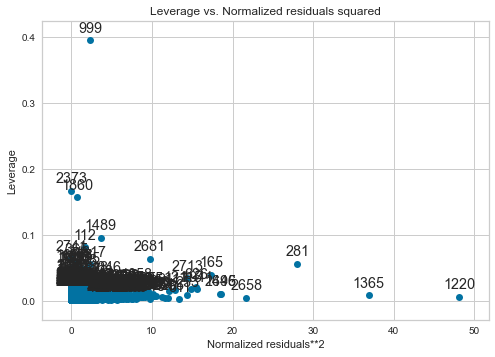

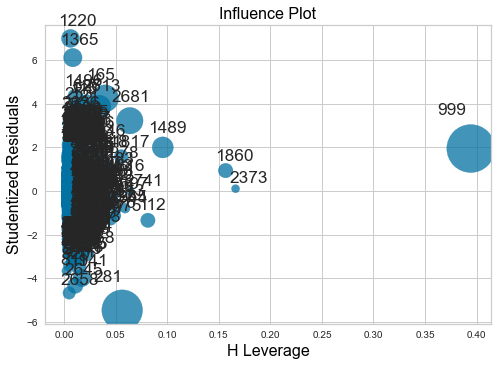

In [527]:
#Plot influential observations
#Use residual squared to restrict the graph but preserve the relative position of observations

from statsmodels.graphics.regressionplots import *
plot_leverage_resid2(model)
plt.show()

influence_plot(model)
plt.show()

### 5.7 Identify influential observations with DFFITS

In [528]:
#GENERAL MEASURE OF INFLUENCE
#Identify influential observations with DFFITS
#conventional cut-off point for DFITS is 2*sqrt(k/n)
import math
print(yres.target_deathrate[abs(yres.dffits) > 2 * math.sqrt(16 / 3047)])

17      153.8
30      185.6
33      128.0
68      168.1
104     120.2
        ...  
3033    209.6
3035    214.7
3039    208.3
3040    215.9
3046    213.6
Name: target_deathrate, Length: 217, dtype: float64


### 5.8 Identify influential observations with Cook's Distance

In [529]:
#Cook's D of more than 3 times the mean is a possible outlier
#MEDVres.loc[:,"cooks_d"].mean()
cutoff=(yres.loc[:,"cooks_d"].mean())*3
outlier2=pd.DataFrame((yres.target_deathrate[abs(yres.cooks_d) > cutoff]))
print(outlier2)

      target_deathrate
30               185.6
33               128.0
112              167.7
115              262.1
118              123.8
...                ...
3033             209.6
3035             214.7
3039             208.3
3040             215.9
3046             213.6

[170 rows x 1 columns]


In [530]:
from yellowbrick.regressor import CooksDistance

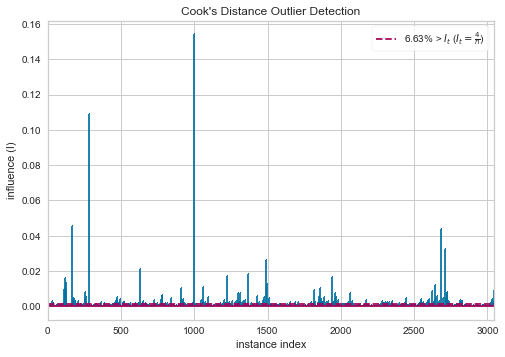

<AxesSubplot:title={'center':"Cook's Distance Outlier Detection"}, xlabel='instance index', ylabel='influence (I)'>

In [531]:
visualizer = CooksDistance()
visualizer.fit(X_new1, y)
visualizer.show()

### 5.9 Final set of influential observations 

In [532]:
outlier=pd.DataFrame((yres.target_deathrate[abs(r) > 2]))
lev= pd.DataFrame((yres.target_deathrate[abs(l) > ((2*16)+2)/3047]))
dffits = pd.DataFrame((yres.target_deathrate[abs(yres.dffits) > 2 * math.sqrt(16 / 3047)]))
cooks = pd.DataFrame((yres.target_deathrate[abs(yres.cooks_d) > cutoff]))
Influential1 = pd.merge(outlier,lev, left_index=True, right_index=True)
Influential2 = pd.merge(dffits,cooks,left_index = True, right_index = True)
Influential = pd.merge(Influential1 , Influential2 , left_index=True, right_index=True)
print(Influential.index)

Int64Index([ 115,  118,  119,  121,  123,  165,  255,  263,  281,  475,  626,
             782,  911, 1058, 1289, 1296, 1309, 1883, 1941, 1957, 1964, 2065,
            2625, 2681, 2695, 2713, 2719, 2725, 2726, 2733, 2824, 3046],
           dtype='int64')


### 5.10 Visulize influential observaions

In [536]:
yres.columns

Index(['target_deathrate', 'dfb_const', 'dfb_avganncount',
       'dfb_avgdeathsperyear', 'dfb_incidencerate', 'dfb_popest2015',
       'dfb_medianagemale', 'dfb_percentmarried', 'dfb_pcths18_24',
       'dfb_pcths25_over', 'dfb_pctbachdeg25_over', 'dfb_pctprivatecoverage',
       'dfb_pctempprivcoverage', 'dfb_pctwhite', 'dfb_pctotherrace',
       'dfb_pctmarriedhouseholds', 'dfb_birthrate', 'dfb_pctemployed16_over',
       'cooks_d', 'standard_resid', 'leverage', 'dffits_internal',
       'student_resid', 'dffits'],
      dtype='object')

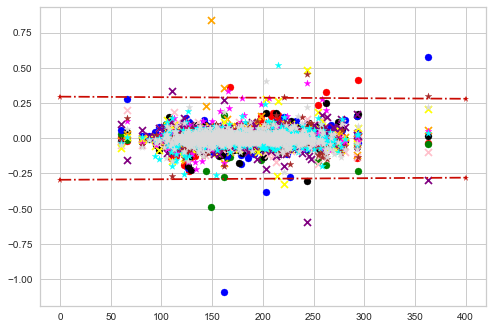

In [537]:
#dfbetas above 2/sqrt(n) is suspect

plt.scatter(yres.target_deathrate, yres.dfb_avganncount, color = "red", marker = "o")
plt.scatter(yres.target_deathrate, yres.dfb_avgdeathsperyear, color = "green", marker = "o")
plt.scatter(yres.target_deathrate, yres.dfb_incidencerate, color = "blue", marker = "o")
plt.scatter(yres.target_deathrate, yres.dfb_pcths18_24, color = "black", marker = "o")

plt.scatter(yres.target_deathrate, yres.dfb_popest2015, color = "orange", marker = "x")
plt.scatter(yres.target_deathrate, yres.dfb_pcths25_over, color = "pink", marker = "x")
plt.scatter(yres.target_deathrate, yres.dfb_medianagemale, color = "yellow", marker = "x")
plt.scatter(yres.target_deathrate, yres.dfb_percentmarried, color = "purple", marker = "x")

plt.scatter(yres.target_deathrate, yres.dfb_pctotherrace, color = "magenta", marker = "*")
plt.scatter(yres.target_deathrate, yres.dfb_pctmarriedhouseholds, color = "brown", marker = "*")
plt.scatter(yres.target_deathrate, yres.dfb_birthrate, color = "cyan", marker = "*")
plt.scatter(yres.target_deathrate, yres.dfb_pctemployed16_over, color = "0.855", marker = "*")

plt.plot((0, 400), (0.295, 0.28), '-.r*')
plt.plot((0, 400), (-0.295, -0.28), '-.r*')


In [534]:
#Remove influential observations and rerun regression
X_new2 = X_new1.drop([115,  118,  119,  121,  123,  165,  255,  263,  281,  475,  626,
             782,  911, 1058, 1289, 1296, 1309, 1883, 1941, 1957, 1964, 2065,
            2625, 2681, 2695, 2713, 2719, 2725, 2726, 2733, 2824, 3046])
y_new = y.drop([115,  118,  119,  121,  123,  165,  255,  263,  281,  475,  626,
             782,  911, 1058, 1289, 1296, 1309, 1883, 1941, 1957, 1964, 2065,
            2625, 2681, 2695, 2713, 2719, 2725, 2726, 2733, 2824, 3046])

### 5.11 Final Feature Set

In [535]:
X_new2

avganncount  avgdeathsperyear  incidencerate  popest2015  medianagemale  \
0        0.558328          0.561518       0.761321    0.478696      -0.511128   
1       -0.306003         -0.230067      -0.672179   -0.180448      -1.410622   
2       -0.356140         -0.269746      -1.806881   -0.248055       0.847682   
3       -0.126640          0.031811      -0.327553   -0.081322       0.503195   
4       -0.387917         -0.317360      -1.799549   -0.280592       1.574933   
...           ...               ...            ...         ...            ...   
3041     0.957776         -0.273714       0.096804   -0.223730      -1.640280   
3042     0.957776         -0.339183       0.096804   -0.292683       0.292675   
3043     0.957776         -0.283633       0.096804   -0.199144      -1.965629   
3044     0.957776         -0.277682       0.096804   -0.206992      -1.735971   
3045     0.957776         -0.265778       0.096804   -0.234125      -0.511128   

      percentmarried  pcths18_24  pcths25_over  pctbachdeg25_over  \
0           0.105328    0.496010     -1.649849           1.171327   
1          -1.054799   -1.389694     -1.251770           1.746053   
2           0.351855    0.176212     -0.825256           0.503902   
3           0.134331    0.683477     -0.455611          -0.738248   
4           0.873912    0.881972     -0.199702           0.318507   
...              ...         ...           ...                ...   
3041       -0.967790   -1.907987     -1.010079           1.597737   
3042       -0.112196   -0.783181     -0.370308           0.355586   
3043        0.119830   -0.121531     -1.664067          -0.163522   
3044        0.438865    1.047385     -1.678284          -0.089363   
3045        1.018928    0.242377      0.184160           0.207270   

      pctprivatecoverage  pctempprivcoverage  pctwhite  pctotherrace  \
0               1.009370            0.042734 -0.113862     -0.039818   
1               0.549074            0.254461  0.340912      0.499790   
2              -0.061524           -0.666550  0.444328      0.217176   
3              -0.559396           -0.655964  0.494549     -0.176530   
4              -0.258794           -0.645377  0.638610     -0.424035   
...                  ...                 ...       ...           ...   
3041            1.469667            1.238991  0.650071     -0.275646   
3042            1.309972            0.360325  0.405165     -0.080479   
3043            0.013627            0.783778 -0.484758      3.453599   
3044           -0.221218            0.699087  0.263556      1.051192   
3045            1.084521            0.889642  0.565440      0.042156   

      pctmarriedhouseholds  birthrate  pctemployed16_over  
0                 0.245324   0.241011           -0.279952  
1                -0.893428  -0.658382            0.206166  
2                 0.487085  -0.962391           -1.009128  
3                -0.033835  -0.522020           -0.717457  
4                 0.423570   0.582401           -0.729610  
...                    ...        ...                 ...  
3041             -1.212327  -0.837437            1.749588  
3042             -0.027396   1.074398           -0.304258  
3043              0.116265   1.282386            1.931882  
3044              0.594984   1.092368            1.287777  
3045              1.101742   0.978415            0.996106  

[3015 rows x 16 columns]

### 5.12 Final Target

In [538]:
y_new

0       164.9
1       161.3
2       174.7
3       194.8
4       144.4
        ...  
3041    146.4
3042    149.6
3043    150.1
3044    153.9
3045    175.0
Name: target_deathrate, Length: 3015, dtype: float64

## 6. Linear Regression Model Building

### 6.1 Train-Test Splitting of Data

In [539]:
import sklearn
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X_new2, y_new, test_size = 0.20, random_state = 5)

### 6.2 OLS Model Summary

In [540]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
#Model statistics
model_alt = sm.OLS(Y_train, sm.add_constant(X_train)).fit()
print_model_alt = model_alt.summary()
print(print_model_alt)

                            OLS Regression Results                            
Dep. Variable:       target_deathrate   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     193.9
Date:                Sun, 16 Apr 2023   Prob (F-statistic):               0.00
Time:                        01:20:54   Log-Likelihood:                -10427.
No. Observations:                2412   AIC:                         2.089e+04
Df Residuals:                    2395   BIC:                         2.099e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  179.0483 

### 6.3 Model Parameters

In [541]:
coeffecients = pd.DataFrame(model_alt.params,X_new2.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

Coeffecient
avganncount             -5.324597
avgdeathsperyear         8.471802
incidencerate           11.141189
popest2015              -3.936838
medianagemale           -4.522426
percentmarried           8.226510
pcths18_24               2.087999
pcths25_over             2.085160
pctbachdeg25_over       -5.605908
pctprivatecoverage      -8.252254
pctempprivcoverage       4.920815
pctwhite                -1.511301
pctotherrace            -3.977680
pctmarriedhouseholds    -7.879551
birthrate               -1.756456
pctemployed16_over      -5.241582

### 6.4 Prediction on Test data

In [543]:
y_pred = model_alt.predict(sm.add_constant(X_test))

## 7. Model Evaluation

### 7.1 Evaluation Metrics

In [544]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(Y_test, y_pred))
print('MSE:', metrics.mean_squared_error(Y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

MAE: 13.836749721906232
MSE: 357.4630544174944
RMSE: 18.906693376090235


Text(0, 0.5, 'Predicted Y')

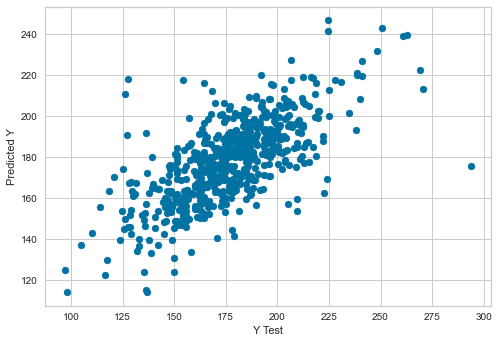

In [545]:
plt.scatter(Y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

### 7.2 Residual Analysis

C:\Users\KEYA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:ylabel='Density'>

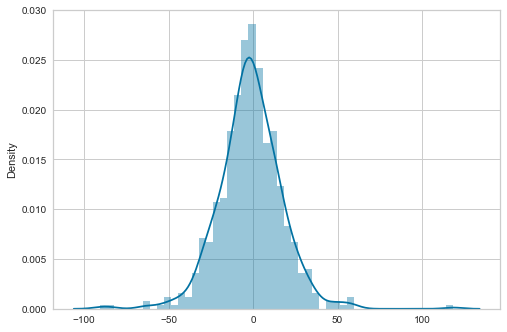

In [546]:
sns.distplot((Y_test-y_pred),bins=50)

The residuals are normally distributed which implies that the assumption that the errors in population are normally distributed holds good

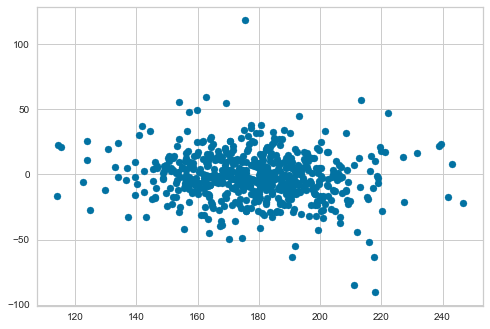

In [547]:
resid = Y_test-y_pred
plt.scatter(y_pred,resid)
plt.show()

This Fitted Value vs Residual plot implies that variance of data is not constant and X variables are having non-linear relation with y.

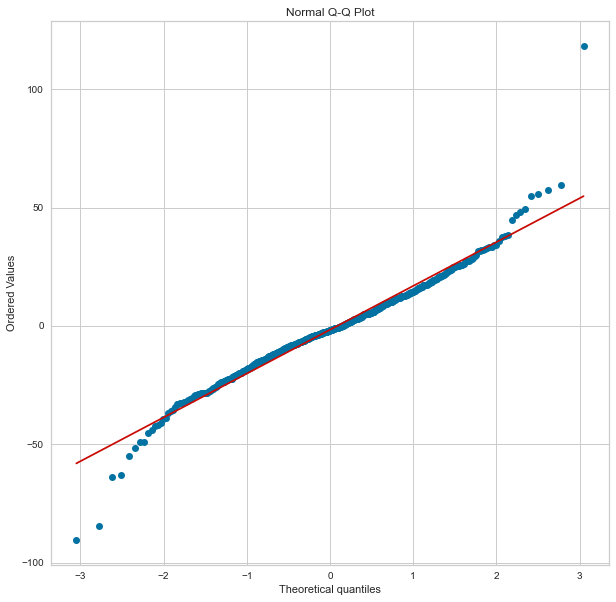

In [548]:
import scipy.stats as stats
plt.figure(figsize=(10,10))
stats.probplot(resid, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot")
plt.show()

This Q-Q plot implies the data is from normal distribution